<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.496632,73.610141,28.261646,-0.089278,179.279142,179.313195,-0.034053
1,0.0,1.0,81.483887,58.747774,58.421880,0.024525,208.678067,208.634373,0.043694
2,0.0,2.0,61.902207,35.121183,41.762415,-0.093079,148.692726,148.757999,-0.065273
3,0.0,3.0,64.620418,99.660235,70.253440,-0.068235,244.465858,244.520628,-0.054769
4,0.0,4.0,54.519854,67.782378,24.734134,-0.070876,156.965489,156.981345,-0.015855
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.333993,23.959161,24.000855,0.132965,155.426974,155.306608,0.120366
29996,999.0,26.0,84.007041,75.638834,50.184506,0.053224,219.883605,219.817131,0.066475
29997,999.0,27.0,85.799815,28.100518,27.064536,-0.014929,150.949940,150.971641,-0.021701
29998,999.0,28.0,48.133899,35.564140,65.964910,-0.063540,159.599409,159.646313,-0.046904


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.496632,73.610141,28.261646,-0.089278,179.279142,179.313195,-0.034053
1,0.0,1.0,81.483887,58.747774,58.421880,0.024525,208.678067,208.634373,0.043694
2,0.0,2.0,61.902207,35.121183,41.762415,-0.093079,148.692726,148.757999,-0.065273
3,0.0,3.0,64.620418,99.660235,70.253440,-0.068235,244.465858,244.520628,-0.054769
4,0.0,4.0,54.519854,67.782378,24.734134,-0.070876,156.965489,156.981345,-0.015855
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.333993,23.959161,24.000855,0.132965,155.426974,155.306608,0.120366
29996,999.0,26.0,84.007041,75.638834,50.184506,0.053224,219.883605,219.817131,0.066475
29997,999.0,27.0,85.799815,28.100518,27.064536,-0.014929,150.949940,150.971641,-0.021701
29998,999.0,28.0,48.133899,35.564140,65.964910,-0.063540,159.599409,159.646313,-0.046904


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.496632  73.610141  28.261646 -0.089278  179.279142   
      1.0    81.483887  58.747774  58.421880  0.024525  208.678067   
      2.0    61.902207  35.121183  41.762415 -0.093079  148.692726   
      3.0    64.620418  99.660235  70.253440 -0.068235  244.465858   
      4.0    54.519854  67.782378  24.734134 -0.070876  156.965489   
...                ...        ...        ...       ...         ...   
999.0 25.0   97.333993  23.959161  24.000855  0.132965  155.426974   
      26.0   84.007041  75.638834  50.184506  0.053224  219.883605   
      27.0   85.799815  28.100518  27.064536 -0.014929  150.949940   
      28.0   48.133899  35.564140  65.964910 -0.063540  159.599409   
      29.0   97.620185  42.244534  23.090473 -0.079862  172.875329   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.313195 -0.034053  
      1.0    208.634373  0.043694  
      2.0    148.757999 -0.065273  
      3.0    244.520628 -0.054769  
      4.0    156.981345 -0.015855  
...                 ...       ...  
999.0 25.0   155.306608  0.120366  
      26.0   219.817131  0.066475  
      27.0   150.971641 -0.021701  
      28.0   159.646313 -0.046904  
      29.0   172.962530 -0.087201  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.496632  73.610141  28.261646 -0.089278  179.279142   
      1.0    81.483887  58.747774  58.421880  0.024525  208.678067   
      2.0    61.902207  35.121183  41.762415 -0.093079  148.692726   
      3.0    64.620418  99.660235  70.253440 -0.068235  244.465858   
      4.0    54.519854  67.782378  24.734134 -0.070876  156.965489   
...                ...        ...        ...       ...         ...   
999.0 25.0   97.333993  23.959161  24.000855  0.132965  155.426974   
      26.0   84.007041  75.638834  50.184506  0.053224  219.883605   
      27.0   85.799815  28.100518  27.064536 -0.014929  150.949940   
      28.0   48.133899  35.564140  65.964910 -0.063540  159.599409   
      29.0   97.620185  42.244534  23.090473 -0.079862  172.875329   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.313195 -0.034053  
      1.0    208.634373  0.043694  
      2.0    148.757999 -0.065273  
      3.0    244.520628 -0.054769  
      4.0    156.981345 -0.015855  
...                 ...       ...  
999.0 25.0   155.306608  0.120366  
      26.0   219.817131  0.066475  
      27.0   150.971641 -0.021701  
      28.0   159.646313 -0.046904  
      29.0   172.962530 -0.087201  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,67.496632,73.610141,28.261646,-0.089278,179.279142,179.313195,-0.034053
1,0.0,1.0,81.483887,58.747774,58.421880,0.024525,208.678067,208.634373,0.043694
2,0.0,2.0,61.902207,35.121183,41.762415,-0.093079,148.692726,148.757999,-0.065273
3,0.0,3.0,64.620418,99.660235,70.253440,-0.068235,244.465858,244.520628,-0.054769
4,0.0,4.0,54.519854,67.782378,24.734134,-0.070876,156.965489,156.981345,-0.015855
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.333993,23.959161,24.000855,0.132965,155.426974,155.306608,0.120366
29996,999.0,26.0,84.007041,75.638834,50.184506,0.053224,219.883605,219.817131,0.066475
29997,999.0,27.0,85.799815,28.100518,27.064536,-0.014929,150.949940,150.971641,-0.021701
29998,999.0,28.0,48.133899,35.564140,65.964910,-0.063540,159.599409,159.646313,-0.046904


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    67.496632  73.610141  28.261646 -0.089278  179.279142   
      1.0    81.483887  58.747774  58.421880  0.024525  208.678067   
      2.0    61.902207  35.121183  41.762415 -0.093079  148.692726   
      3.0    64.620418  99.660235  70.253440 -0.068235  244.465858   
      4.0    54.519854  67.782378  24.734134 -0.070876  156.965489   
...                ...        ...        ...       ...         ...   
999.0 25.0   97.333993  23.959161  24.000855  0.132965  155.426974   
      26.0   84.007041  75.638834  50.184506  0.053224  219.883605   
      27.0   85.799815  28.100518  27.064536 -0.014929  150.949940   
      28.0   48.133899  35.564140  65.964910 -0.063540  159.599409   
      29.0   97.620185  42.244534  23.090473 -0.079862  172.875329   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.313195 -0.034053  
      1.0    208.634373  0.043694  
      2.0    148.757999 -0.065273  
      3.0    244.520628 -0.054769  
      4.0    156.981345 -0.015855  
...                 ...       ...  
999.0 25.0   155.306608  0.120366  
      26.0   219.817131  0.066475  
      27.0   150.971641 -0.021701  
      28.0   159.646313 -0.046904  
      29.0   172.962530 -0.087201  

[30000 rows x 7 columns]

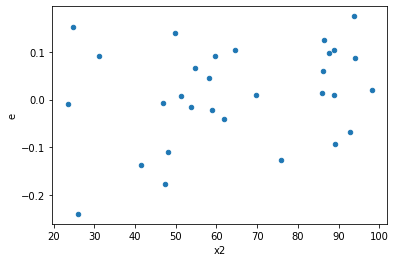

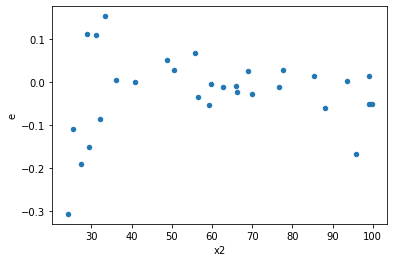

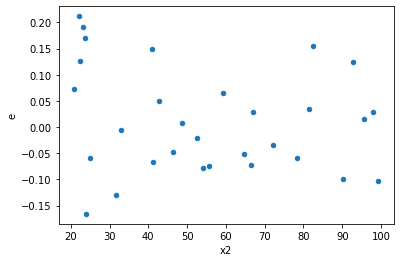

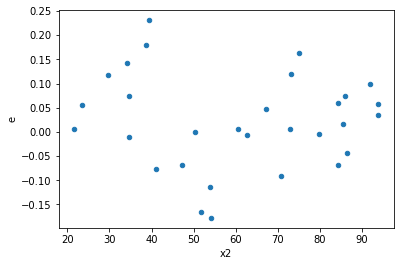

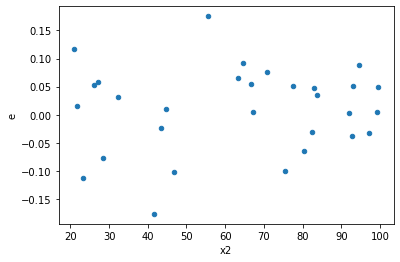

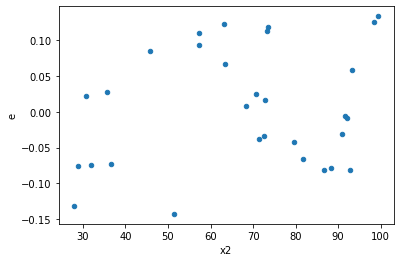

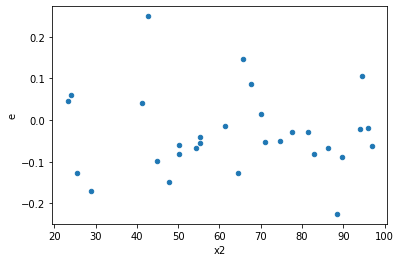

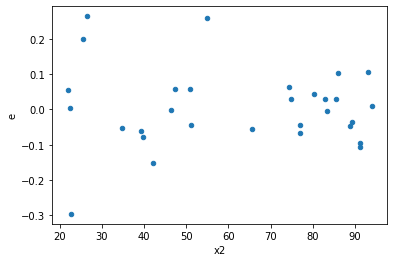

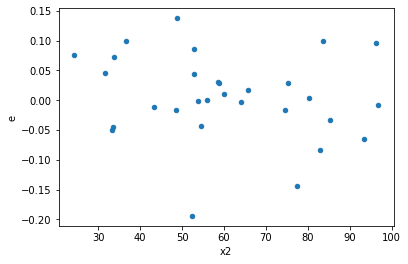

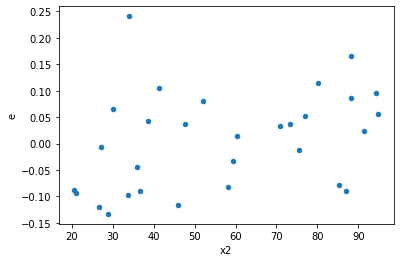

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,9.0,9.0,0.04620007550024393,0.14893944305110002,0.005133341722249326,0.01654882700567778,3.2237922003030843,0.09614774064027753,0.9519261296798612,0.04807387032013877,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,0.037293549991358026,0.059509916332169344,0.004143727776817558,0.006612212925796594,1.5957160513268243,0.49723725225267135,0.7513813738736643,0.24861862612633567,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,0.05504459391112958,0.0872221198129593,0.006116065990125509,0.009691346645884367,1.5845719554908675,0.5036555935333009,0.7481722032333495,0.25182779676665046,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,0.03944564073015222,0.05788917171347182,0.004382848970016913,0.006432130190385758,1.467568295049176,0.5768266692666548,0.7115866653666726,0.2884133346333274,Reject005=1 : Homoscedasticity
20.0,9.0,9.0,0.04761424474817522,0.056950828453362794,0.005290471638686136,0.006327869828151421,1.196088035304716,0.7940369819314468,0.6029815090342766,0.3970184909657234,Reject005=1 : Homoscedasticity
26.0,9.0,9.0,0.11413833834267968,0.15047860836866683,0.012682037593631075,0.016719845374296313,1.3183879365483846,0.6871996770457078,0.6564001614771461,0.3435998385228539,Reject005=1 : Homoscedasticity
28.0,9.0,9.0,0.05428659847942392,0.055924895667610414,0.006031844275491547,0.006213877296401157,1.0301786671862936,0.9654000167843062,0.5172999916078469,0.4827000083921531,Reject005=1 : Homoscedasticity
35.0,9.0,9.0,0.03818899875592073,0.06639423508267521,0.004243222083991192,0.007377137231408357,1.7385696730889446,0.4225505102014677,0.7887247448992661,0.21127525510073386,Reject005=1 : Homoscedasticity
37.0,9.0,9.0,0.04385865508955926,0.06605750511269491,0.004873183898839918,0.007339722790299434,1.5061452517822458,0.5514920350075176,0.7242539824962412,0.2757460175037588,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.04251277770690745,0.03812349570823452,0.004723641967434161,0.004235943967581614,0.8967538176655119,0.8737054637710793,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.17620970848181935,0.06971099893716919,0.019578856497979927,0.007745666548574354,0.3956138372725457,0.18335873864277097,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.06881753125285896,0.014801563836606125,0.007646392361428773,0.0016446182040673473,0.21508420263174158,0.031778891770446085,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,0.0701967180940434,0.01977716719019768,0.0077996353437826006,0.0021974630211330755,0.28173919988256385,0.07295991343024964,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,0.07449816020049162,0.023620605726694745,0.00827757335561018,0.002624511747410527,0.31706294038841065,0.10222016577122262,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.04620007550024393,0.14893944305110002,0.005133341722249326,0.01654882700567778,3.2237922003030843,0.09614774064027753,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.03125684708749746,0.022635278545728908,0.0034729830097219396,0.002515030949525434,0.7241702428388204,0.6384467802288875,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,0.04109948131974603,0.03282320060005448,0.004566609035527336,0.0036470222888949425,0.7986280981187164,0.743113128614141,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,0.09482913147071732,0.04527481374803385,0.010536570163413035,0.005030534860892649,0.4774357103757134,0.28592891814595384,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      846
Reject005=0 : Heteroscedasticity    154
Name: Result_test, dtype: int64